In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nreps = [2, 4, 8, 16]
tmax = 600
t0 = 300
ti = []
lmbd = []
for i,nrep in enumerate(nreps):
    exponent = [i/(nrep - 1) for i in range(nrep)]
    print (exponent)
    ti.append([t0*(tmax/t0)**e for e in exponent])
    print (ti)
    lmbd.append([t0/t for t in ti[-1]])
    print (lmbd)
    print ()

[0.0, 1.0]
[[300.0, 600.0]]
[[1.0, 0.5]]

[0.0, 0.3333333333333333, 0.6666666666666666, 1.0]
[[300.0, 600.0], [300.0, 377.97631496846196, 476.2203155904598, 600.0]]
[[1.0, 0.5], [1.0, 0.7937005259840997, 0.6299605249474367, 0.5]]

[0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857143, 0.8571428571428571, 1.0]
[[300.0, 600.0], [300.0, 377.97631496846196, 476.2203155904598, 600.0], [300.0, 331.22685410214365, 365.7040962613426, 403.77005778970687, 445.79828674108455, 492.2012136045828, 543.434198558344, 600.0]]
[[1.0, 0.5], [1.0, 0.7937005259840997, 0.6299605249474367, 0.5], [1.0, 0.9057236642639068, 0.820335356007638, 0.7429971445684742, 0.6729500963161781, 0.6095068271022377, 0.5520447568369062, 0.5]]

[0.0, 0.06666666666666667, 0.13333333333333333, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.6, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8666666666666667, 0.9333333333333333, 1.0]
[

In [3]:
nreps = [2, 4, 8, 16]
tmax = 600
t0 = 300
ti = []
lmbd = []
for i,nrep in enumerate(nreps):
    exponent = [i/(16 - 1) for i in range(nrep)]
    print (exponent)
    ti.append([t0*(tmax/t0)**e for e in exponent])
    print (ti)
    lmbd.append([t0/t for t in ti[-1]])
    print (lmbd)
    print ()

[0.0, 0.06666666666666667]
[[300.0, 314.18823684618803]]
[[1.0, 0.9548416039104165]]

[0.0, 0.06666666666666667, 0.13333333333333333, 0.2]
[[300.0, 314.18823684618803], [300.0, 314.18823684618803, 329.04749390838776, 344.6095064991105]]
[[1.0, 0.9548416039104165], [1.0, 0.9548416039104165, 0.9117224885582169, 0.8705505632961241]]

[0.0, 0.06666666666666667, 0.13333333333333333, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.4666666666666667]
[[300.0, 314.18823684618803], [300.0, 314.18823684618803, 329.04749390838776, 344.6095064991105], [300.0, 314.18823684618803, 329.04749390838776, 344.6095064991105, 360.907510824635, 377.97631496846196, 395.8523732318683, 414.5738639903328]]
[[1.0, 0.9548416039104165], [1.0, 0.9548416039104165, 0.9117224885582169, 0.8705505632961241], [1.0, 0.9548416039104165, 0.9117224885582169, 0.8705505632961241, 0.8312378961427878, 0.7937005259840997, 0.757858283255199, 0.7236346187201891]]

[0.0, 0.06666666666666667, 0.13333333333333333, 0.2, 0.266666666

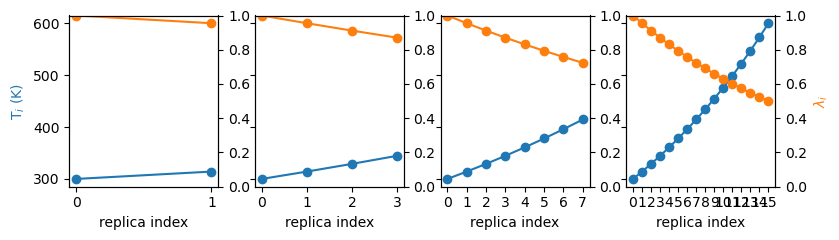

In [4]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

fig, ax = plt.subplots(1,4,figsize=(8.5,2.5), sharey=True)
for i,nrep in enumerate(nreps):
    ax[i].plot(range(nrep), ti[i], 'o-')
    ax[i].set_xticks(range(nrep))
    axt = ax[i].twinx()
    axt.plot(range(nrep), lmbd[i], 'o-', color='C1')
    axt.set_ylim(0,1)
    
axt.set_ylabel('$\lambda_i$', color='C1')
ax[0].set_ylabel('T$_{i}$ (K)', color='C0')
[ax[i].set_xlabel('replica index') for i in range(4)]
plt.tight_layout(w_pad=0)

In [5]:
!for n in 2 4 8 16; do perl /home/david/anaconda3/envs/plumed-mpi/bin/demux.pl "nrep${n}/rep0/md.log"; mv "replica_temp.xvg" "nrep${n}"; mv "replica_index.xvg" "nrep${n}"; done

-----------------------------------------------------------------
Going to read a file containing the exchange information from
your mdrun log file (nrep2/rep0/md.log).
This will produce a file (replica_index.xvg) suitable for
demultiplexing your trajectories using trjcat,
as well as a replica temperature file (replica_temp.xvg).
Each entry in the log file will be copied 0 times.
-----------------------------------------------------------------
There are 2 replicas.
Finished writing replica_index.xvg and replica_temp.xvg with 2500 lines
-----------------------------------------------------------------
Going to read a file containing the exchange information from
your mdrun log file (nrep4/rep0/md.log).
This will produce a file (replica_index.xvg) suitable for
demultiplexing your trajectories using trjcat,
as well as a replica temperature file (replica_temp.xvg).
Each entry in the log file will be copied 0 times.
-----------------------------------------------------------------
There ar

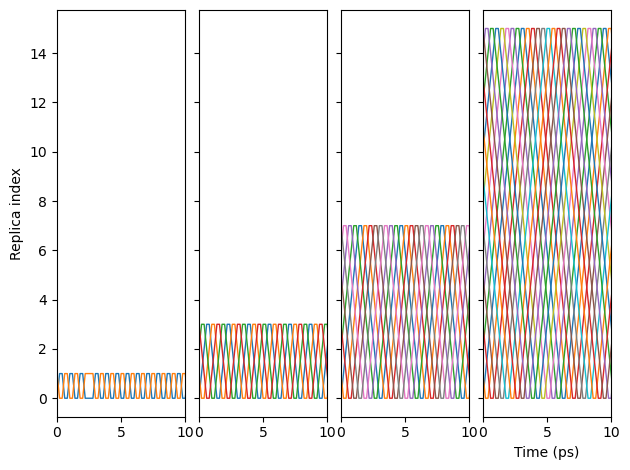

In [6]:
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True)
for i,nrep in enumerate(nreps):
    repl = np.loadtxt("nrep%i/replica_temp.xvg"%nrep)
    for j in range(nrep):
        ax[i].plot(repl[:,0], repl[:,j+1], '-', lw=1, color='C%i'%j)
ax[-1].set_xlim(0,10)
ax[-1].set_xlabel('Time (ps)')
ax[0].set_ylabel('Replica index')
plt.tight_layout(w_pad=0)

In [7]:
for nrep in nreps:
    for i in range(nrep):
        command = "gmx_mpi energy -f nrep%i/rep%i/ener.edr -o nrep%i/rep%i/potential <<EOF\n10\nEOF"%(nrep,i,nrep,i)
        os.system(command)

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep2/rep0/ener.edr -o nrep2/rep0/potential

Opened nrep2/rep0/ener.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10  P


Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 1 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26644.3        7.7    154.906    42.2348  (kJ/mol)

Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 1 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26630.1        6.7    160.994    39.5039  (kJ/mol)

Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 1 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26661.5

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep8/rep1/ener.edr -o nrep8/rep1/potential

Opened nrep8/rep1/ener.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10  P


Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 1 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26645.4        3.3    155.609    6.22608  (kJ/mol)

Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 1 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26646.5        2.4    150.919   -2.45483  (kJ/mol)

Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 1 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26647.4

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep8/rep6/ener.edr -o nrep8/rep6/potential

Opened nrep8/rep6/ener.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10  Potential       11  Kinetic-En.     12  Total-Energy  
 13  Temperature     14  Pressure        15  Constr.-rmsd    16  Vir-XX        
 17  Vir-XY          18  Vir-XZ          19  Vir-YX          20  Vir-


Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 1 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26646.2        3.2    155.931    5.78165  (kJ/mol)

Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 1 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26646.6        4.1    156.294     1.4422  (kJ/mol)

Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 1 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26648.8

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep16/rep6/ener.edr -o nrep16/rep6/potential

Opened nrep16/rep6/ener.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10


Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 1 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26647.4        3.1    154.546    8.37286  (kJ/mol)

Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 1 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26650.3        2.6    152.931    10.0899  (kJ/mol)

Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 1 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                  -26651.1

Last energy frame read 2500 time  500.000         

GROMACS reminds you: "Take away paradox from the thinker and you have a professor." (Soren Kirkegaard)

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep16/rep13/ener.edr -o nrep16/rep13/potential

Opened nrep16/rep13/ener.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2 

NameError: name 'ax0' is not defined

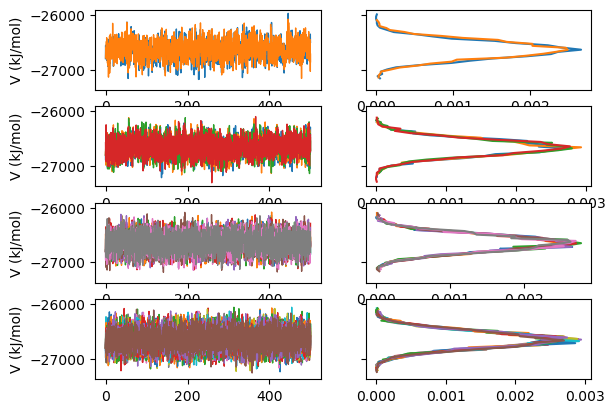

In [8]:
aver = []
fig, ax = plt.subplots(4,2, sharey=True)
nbins = 30
for i, nrep in enumerate(nreps):
    for j in range(nrep):
        file = "nrep%i/rep%i/potential.xvg"%(nrep,j)
        data = np.loadtxt(file, comments=["#", "@"])
        ax[i][0].plot(data[:,0], data[:,1], lw=1, label='$\lambda=$%g'%lmbd[i][j])
        aver.append(np.mean(data[:,1]))
        
        hist, edges = np.histogram(data[20:,1], bins=nbins, density=True)
        centers = [np.mean(edges[i:i+2]) for i in range(nbins)]
        ax[i][1].plot(hist, centers)

[ax[i][0].set_ylabel('V (kJ/mol)') for i in range(4)]
ax0[0].set_xlim(0, data[-1,0])
ax[-1,0].set_xlabel('Time (ps)')
ax[-1,1].set_xlabel('P(V)')
plt.tight_layout()


In [ ]:
gmx = "/home/david/anaconda3/envs/plumed-mpi/bin/gmx_mpi"
mdp = "../sd_nvt_rerun.mdp"
gro = "../alaTB_ff03_tip3p_npt.gro"

for i, nrep in enumerate(nreps):
    for j in range(nrep):
        folder = "nrep%i/rep%i"%(nrep,j)
        top = "%s/scaled.top"%folder
        tpr = "%s/alaTB_ff03_tip3p_nvt_rerun.tpr"%folder
        command = gmx + " grompp -f %s -p %s -c %s -o %s"%(mdp, top, gro, tpr)
        os.system(command)
        
        tpr = "%s/alaTB_ff03_tip3p_nvt_rerun.tpr"%folder
        xtc = "%s/traj_comp.xtc"%folder
        edr = "%s/ener_rerun.edr"%folder
        command = "%s mdrun -s %s -nsteps 100000 -ntomp 1 -rerun %s -e %s"%(gmx, tpr, xtc, edr)
        print (command)
        os.system(command)

In [9]:
for nrep in nreps:
    for i in range(nrep):
        command = "gmx_mpi energy -f nrep%i/rep%i/ener_rerun.edr -o nrep%i/rep%i/potential_rerun <<EOF\n10\n3\n11\n12\n15\n16\n19\n20\nEOF"%(nrep,i,nrep,i)
        os.system(command)

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep2/rep0/ener_rerun.edr -o nrep2/rep0/potential_rerun

Opened nrep2/rep0/ener_rerun.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Cou


Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 8 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Proper Dih.                 62.3605       0.14    4.63982   0.658786  (kJ/mol)
Potential                  -26646.2        3.1    152.674    4.04287  (kJ/mol)
Coul-SR:Protein-Protein    -273.612       0.53    8.89115   0.497495  (kJ/mol)
LJ-SR:Protein-Protein      -4.35512       0.08    1.52483  -0.241435  (kJ/mol)
Coul-SR:Protein-SOL        -127.152       0.56    21.4171   -1.85953  (kJ/mol)
LJ-SR:Protein-SOL          -38.5462       0.13    10.5955  -0.387172  (kJ/mol)
Coul-SR:SOL-SOL            -30718.5        5.4    250.113      2.655  (kJ/mol)
LJ-SR:SOL-SOL               4212.13        3.2    164.664   0.726426  (kJ/mol)

Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 8 data sets
All statistics are over 2

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep8/rep1/ener_rerun.edr -o nrep8/rep1/potential_rerun

Opened nrep8/rep1/ener_rerun.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.                        10  Potential                         
 11  Coul-SR:Protein-Protein             12  LJ-SR:Protein-Protein             
 13  Coul-14:Protein-Protein             14  LJ-14:


Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 8 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Proper Dih.                 62.1499      0.061    4.53146  -0.230467  (kJ/mol)
Potential                  -26646.8        2.6    151.683   -2.29986  (kJ/mol)
Coul-SR:Protein-Protein    -273.113       0.38    8.83753    1.55827  (kJ/mol)
LJ-SR:Protein-Protein      -4.37551      0.034    1.42242   0.036878  (kJ/mol)
Coul-SR:Protein-SOL        -126.177       0.59    21.0444  -0.757229  (kJ/mol)
LJ-SR:Protein-SOL          -39.1615        0.2    10.2266   0.189978  (kJ/mol)
Coul-SR:SOL-SOL            -30721.5        4.5     248.41   -18.2063  (kJ/mol)
LJ-SR:SOL-SOL               4214.78        3.2    165.464     15.097  (kJ/mol)

Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 8 data sets
All statistics are over 2

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep16/rep0/ener_rerun.edr -o nrep16/rep0/potential_rerun

Opened nrep16/rep0/ener_rerun.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.                        10  Potential                         
 11  Coul-SR:Protein-Protein             12  LJ-SR:Protein-Protein             
 13  Coul-14:Protein-Protein             14  LJ-


Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 8 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Proper Dih.                 62.0198      0.085    4.51696   0.100216  (kJ/mol)
Potential                  -26648.1        3.6    155.285    5.10102  (kJ/mol)
Coul-SR:Protein-Protein    -273.486       0.21    8.91488   0.886663  (kJ/mol)
LJ-SR:Protein-Protein      -4.27354      0.045    1.45607   0.153092  (kJ/mol)
Coul-SR:Protein-SOL        -126.025       0.47    21.4772 -0.0624152  (kJ/mol)
LJ-SR:Protein-SOL          -38.6015       0.15     10.463  -0.809731  (kJ/mol)
Coul-SR:SOL-SOL            -30724.2          6    250.882    6.36845  (kJ/mol)
LJ-SR:SOL-SOL               4216.21        3.6    165.079   -0.84499  (kJ/mol)

Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 8 data sets
All statistics are over 2

Last energy frame read 2500 time  500.000         

GROMACS reminds you: "Does All This Money Really Have To Go To Charity ?" (Rick)

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep16/rep8/ener_rerun.edr -o nrep16/rep8/potential_rerun

Opened nrep16/rep8/ener_rerun.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle 


Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 8 data sets
All statistics are over 2501 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Proper Dih.                 62.1155      0.045    4.42716  -0.248267  (kJ/mol)
Potential                  -26653.2        5.2    153.513    30.4714  (kJ/mol)
Coul-SR:Protein-Protein     -273.47       0.21    8.72896     1.0516  (kJ/mol)
LJ-SR:Protein-Protein      -4.34519      0.035    1.53387   0.256881  (kJ/mol)
Coul-SR:Protein-SOL        -126.187       0.47    21.4063    1.26523  (kJ/mol)
LJ-SR:Protein-SOL          -39.0238        0.2     10.145   0.491056  (kJ/mol)
Coul-SR:SOL-SOL            -30723.6        5.9    250.021    38.1876  (kJ/mol)
LJ-SR:SOL-SOL                4211.2        3.1    162.397   -10.9244  (kJ/mol)

Statistics over 250001 steps [ 0.0000 through 500.0000 ps ], 8 data sets
All statistics are over 2

                      :-) GROMACS - gmx energy, 2023.2 (-:

Executable:   /usr/local/gromacs/2023.2/bin/gmx_mpi
Data prefix:  /usr/local/gromacs/2023.2
Working dir:  /home/david/Research/Projects/Simulation/PLUMED/REST2/test_replicas
Command line:
  gmx_mpi energy -f nrep16/rep15/ener_rerun.edr -o nrep16/rep15/potential_rerun

Opened nrep16/rep15/ener_rerun.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.                        10  Potential                         
 11  Coul-SR:Protein-Protein             12  LJ-SR:Protein-Protein             
 13  Coul-14:Protein-Protein             14  

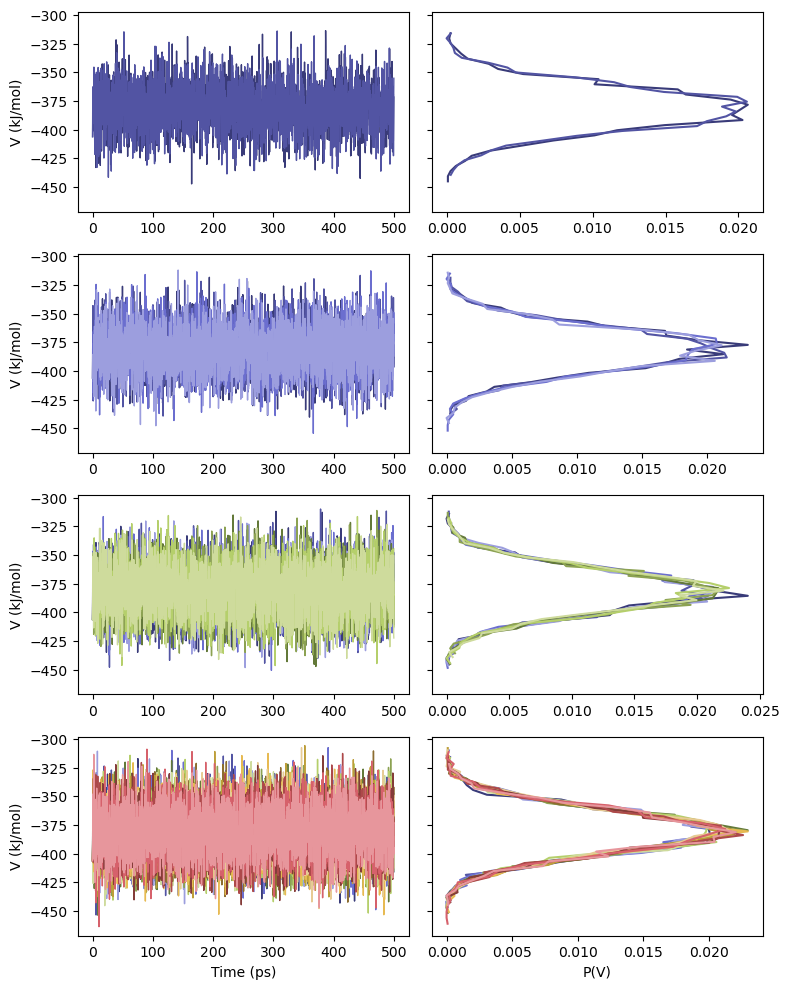

In [11]:
aver = []
fig, ax = plt.subplots(4,2, sharey=True, figsize=(8,10))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b.colors)
nbins = 30
for i, nrep in enumerate(nreps):
    for j in range(nrep):
        file = "nrep%i/rep%i/potential_rerun.xvg"%(nrep,j)
        data = np.loadtxt(file, comments=["#", "@"])
        Erest = data[:,1] + data[:,3] + data[:,4] + data[:,5] + data[:,6]
        ax[i][0].plot(data[:,0], Erest, lw=1, label='$\lambda=$%g'%lmbd[i][j])
        aver.append(np.mean(data[:,1]))
        
        hist, edges = np.histogram(Erest[20:], bins=nbins, density=True)
        centers = [np.mean(edges[i:i+2]) for i in range(nbins)]
        ax[i][1].plot(hist, centers)

[ax[i][0].set_ylabel('V (kJ/mol)') for i in range(4)]
#ax[0].set_xlim(0, data[-1,0])
ax[-1,0].set_xlabel('Time (ps)')
ax[-1,1].set_xlabel('P(V)')
plt.tight_layout()


In [12]:
import matplotlib as mpl
import mdtraj as md

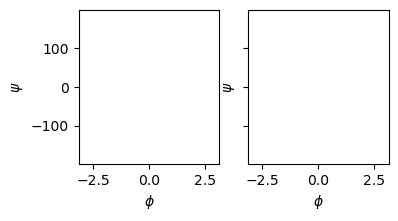

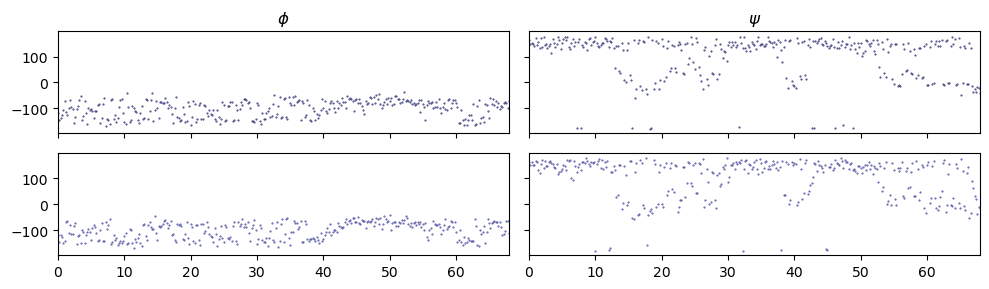

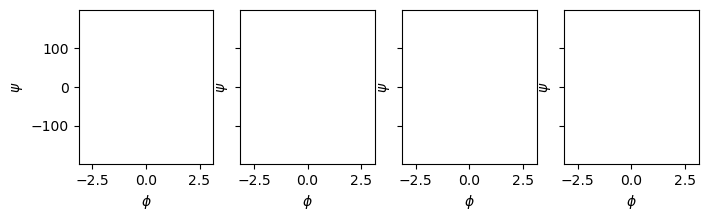

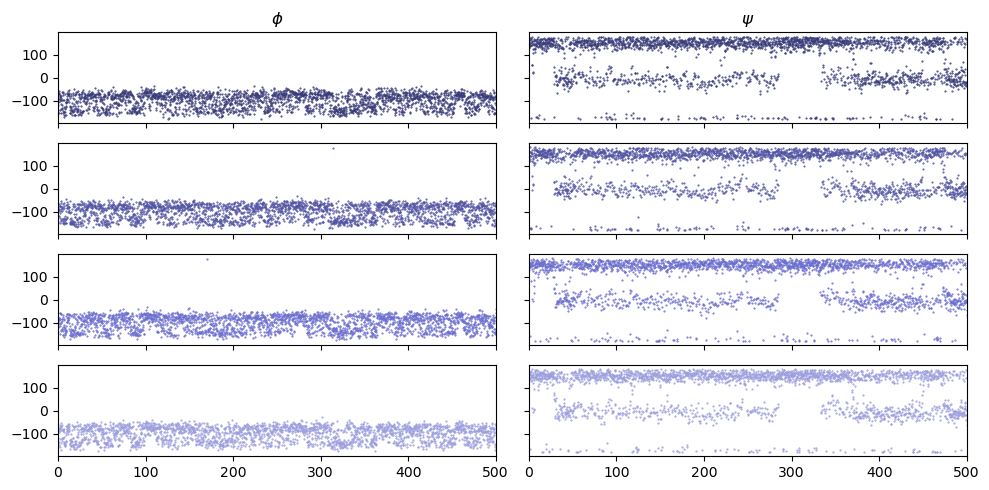

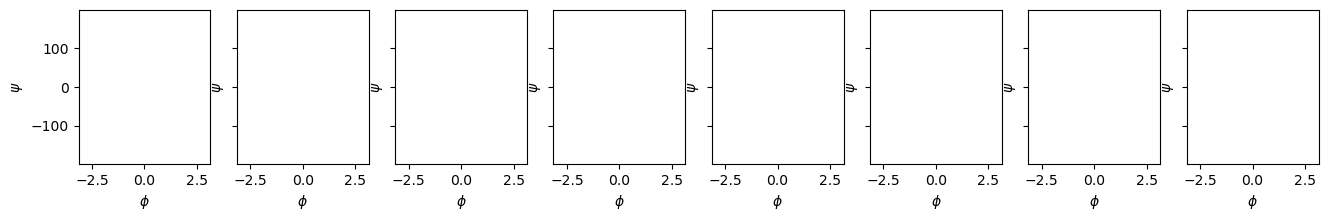

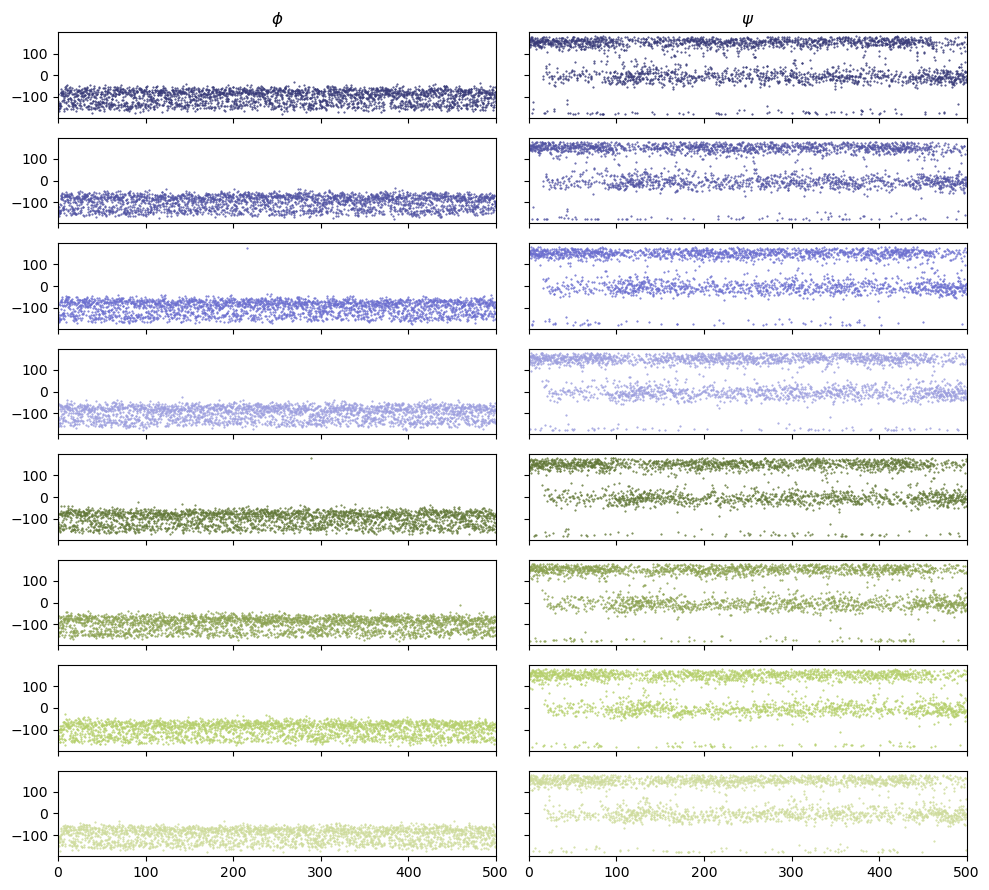

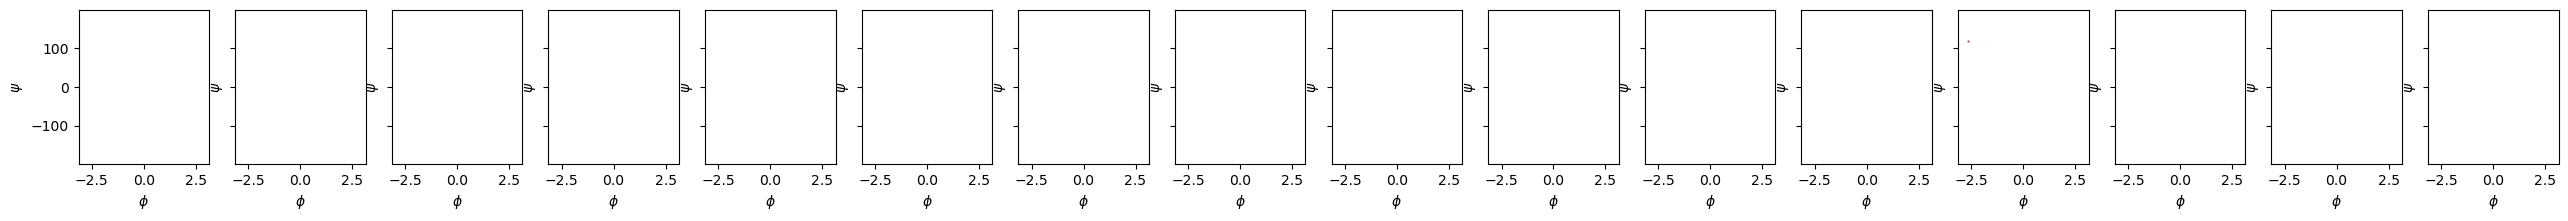

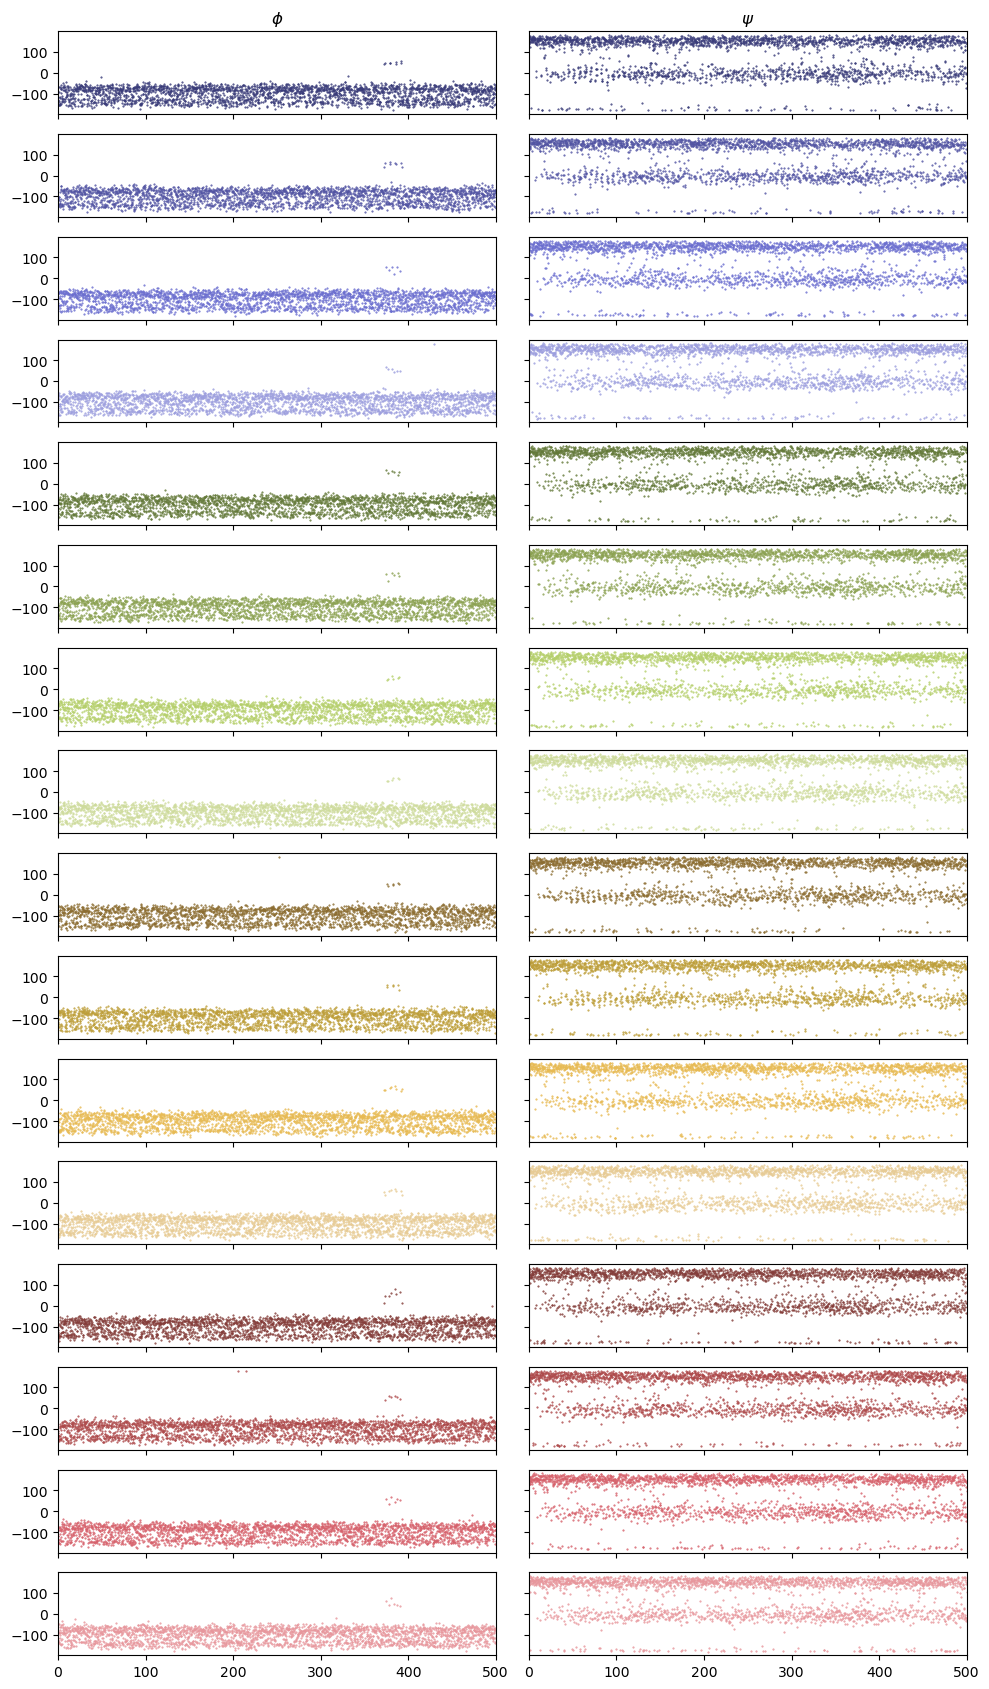

In [16]:
for j,nrep in enumerate(nreps):
    fig0, ax0 = plt.subplots(1,nrep, figsize=(nrep*2,2), sharex=True, sharey=True)
    fig, ax = plt.subplots(nrep,2, figsize=(10,nrep+1), sharex=True, sharey=True)
    for i in range(nrep):
        traj = md.load_xtc("nrep%i/rep%i/traj_comp.xtc"%(nrep,i), top="../alaTB_ff03_tip3p_npt.gro")
        dih, phi = md.compute_phi(traj)
        dih, psi = md.compute_psi(traj)
        ax[i][0].plot(traj.time, 180./np.pi*phi.ravel(), '.', ms=1, color='C%i'%i)
        ax[i][1].plot(traj.time, 180./np.pi*psi.ravel(), '.', ms=1, color='C%i'%i)
        ax0[i].plot(180./np.pi*phi.ravel(),180./np.pi*psi.ravel(), '.', ms=1, color='C%i'%i)
        ax0[i].set_xlabel('$\phi$')
        ax0[i].set_xlim(-np.pi, np.pi); ax0[i].set_ylabel('$\psi$')
    ax0[0].set_ylabel('$\psi$')
    ax[0][0].set_title('$\phi$')
    ax[0][1].set_title('$\psi$')
    ax[0][0].set_xlim(0,traj.time[-1])
    plt.tight_layout()